# Challenge 4
Veena Kumar

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error


%matplotlib inline

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Exercise 4.1

Generate (fake) data that is linearly related to log(x). You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model. Then fit two models to it: quadratic (second degree polynomial) logarithmic (log(x)) (The second one should fit really well, since it has the same form as the underlying model!)

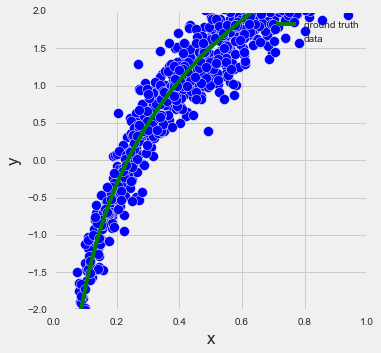

In [64]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

np.random.seed(9)

def f(x):
    return 2.9 + 2*np.log(x)

x_plot = np.linspace(0, 1, 1000)
n_samples = 1000
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [65]:
model = sm.OLS(y,sm.add_constant(X**3))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     756.5
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          2.06e-124
Time:                        20:25:09   Log-Likelihood:                -1795.7
No. Observations:                1000   AIC:                             3595.
Df Residuals:                     998   BIC:                             3605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1842      0.062     -2.971      0.003        -0.306    -0.063
x1             4.6578      0.169     27.505      0.000         4.325     4.990
==============================================================================
Omnibus:                      739.120   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18111.645
Skew:                          -3.115   Prob(JB):                         0.00
Kurtosis:                      22.897   Cond. No.                         3.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model2 = sm.OLS(y,sm.add_constant(np.log(X)))
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 3.932e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        20:25:12   Log-Likelihood:                -228.48
No. Observations:                1000   AIC:                             461.0
Df Residuals:                     998   BIC:                             470.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.8807      0.014    210.636      0.000         2.854     2.908
x1             1.9867      0.010    198.281      0.000         1.967     2.006
==============================================================================
Omnibus:                        1.311   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                1.206
Skew:                          -0.080   Prob(JB):                        0.547
Kurtosis:                       3.059   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 4.2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.) Split the data into a training and test set. Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set. (You could use sklearn.metrics.mean_squared_error.)

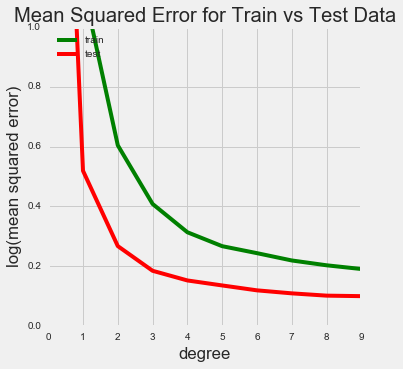

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


figsize(5,5)
plt.style.use('fivethirtyeight')

np.random.seed(9)

def f(x):
    return 2.9 + 2*x + .5*(x**2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

train_error = np.empty(10)
test_error = np.empty(10)

x_plot = np.linspace(0, 1, 1000)
n_samples = 1000
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.title('Mean Squared Error for Train vs Test Data');


## Exercise 4.3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error  
test error  
R squared  

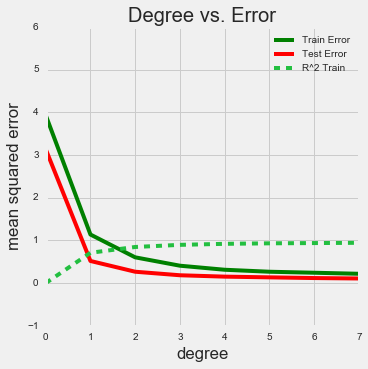

In [68]:
train_error = np.empty(8)
test_error = np.empty(8)
rsqr_train = np.empty(8)
rsqr_test = np.empty(8)
rsqr_train_values = []
rsqr_test_values = []

for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    rsqr_train[degree] = est.score(X_train, y_train)
    rsqr_test[degree] = est.score(X_test, y_test)
    rsqr_train_values.append(rsqr_train[degree])
    rsqr_test_values = (rsqr_test[degree])
    
plt.plot(np.arange(8), train_error, color='green', label='Train Error')
plt.plot(np.arange(8), test_error, color='red', label='Test Error')
plt.plot(rsqr_train_values,ls='dashed',color='#23BF40',label='R^2 Train')
plt.ylim((-1, 6))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.title('Degree vs. Error');

## Exercise 4.4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

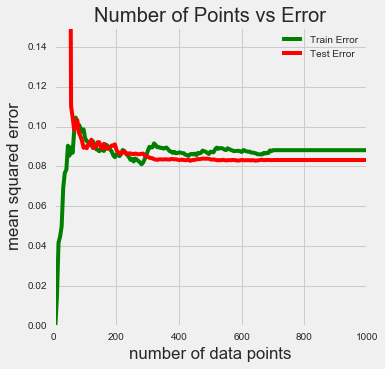

In [80]:
train_error = []
test_error = []
m = list(range(5, 1001, 5))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for i,v in enumerate(m):
    est.fit(X_train[:v], y_train[:v])
    train_error.append(mean_squared_error(y_train[:v], est.predict(X_train[:v])))
    test_error.append(mean_squared_error(y_test, est.predict(X_test)))

    
plt.plot(m,train_error, color='green', label='Train Error')
plt.plot(m,test_error, color='red', label='Test Error')
plt.ylim((0,.15))
plt.ylabel('mean squared error')
plt.xlabel('number of data points')
plt.legend(loc='upper right')
plt.title('Number of Points vs Error'); 